In [1]:
apikey="OK8tMupr8C3vWNK6mlsEmyQPAx3UKD4qjDPwI442xIpSDtl3WJ2Yodf6nxVd3sXb"
secret="hgT8l2EdTSQf7aeH96J8VhupLRy1CJJ29Omldwsh5AIC1BVZc1HUiR3A7mraL2It"

In [2]:
!pip install python-binance pandas mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 70 kB 8.0 MB/s 
     |████████████████████████████████| 112 kB 41.5 MB/s 
     |████████████████████████████████| 288 kB 36.9 MB/s 
     |████████████████████████████████| 749 kB 31.4 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [3]:
!pip install gym==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.4 MB/s 
  Created wheel for gym: filename=gym-0.19.0-py3-none-any.whl size=1663115 sha256=401b6f0265a6c970fbe5ec8dc1fd14d8ddb028cfff23e708b734b52680204b5f
  Stored in directory: /root/.cache/pip/wheels/ef/9d/70/8bea53f7edec2fdb4f98d9d64ac9f11aea95dfcb98099d7712
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.1
    Uninstalling gym-0.25.1:
      Successfully uninstalled gym-0.25.1


In [4]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 7.6 kB/s 
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 240 kB 45.4 MB/s 
     |████████████████████████████████| 171 kB 19.0 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 503 kB 48.0 MB/s 
     |████████████████████████████████| 3.8 MB 33.5 MB/s 
     |████████████████████████████████| 1.1 MB 35.6 MB/s 
     |████████████████████████████████| 2.8 MB 35.0 MB/s 
Reason for being yanked: re-release with new wheels
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=eddd285e4458f93cdf708b1f00bdab2758f12801a51591280e08fc97db2ff731
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: atari-py
    Found existing 

In [5]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documen

In [6]:
from binance import Client, ThreadedWebsocketManager,ThreadedDepthCacheManager
import pandas as pd
import numpy as np

In [7]:
client = Client(apikey,secret)

In [8]:
def getdailydata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol,'1d','1585 days ago UTC'))
    if len(frame) > 0:
        frame = frame.iloc[:,:6]
        frame.columns = ['Time','Open','High','Low','Close','Volume']
        frame = frame.set_index('Time')
        frame.index = pd.to_datetime(frame.index,unit='ms')
        frame = frame.astype(float)
        return frame

In [9]:
btc=getdailydata('BTCUSDT')

In [10]:
env = gym.make('stocks-v0', df=btc, frame_bound=(5,100), window_size=5)

In [11]:
env.signal_features

array([[ 8.85698e+03,  0.00000e+00],
       [ 8.91531e+03,  5.83300e+01],
       [ 8.78702e+03, -1.28290e+02],
       [ 8.93401e+03,  1.46990e+02],
       [ 9.61999e+03,  6.85980e+02],
       [ 8.86999e+03, -7.50000e+02],
       [ 9.26600e+03,  3.96010e+02],
       [ 8.91535e+03, -3.50650e+02],
       [ 9.34800e+03,  4.32650e+02],
       [ 9.41900e+03,  7.10000e+01],
       [ 9.24601e+03, -1.72990e+02],
       [ 9.07148e+03, -1.74530e+02],
       [ 9.24784e+03,  1.76360e+02],
       [ 9.75000e+03,  5.02160e+02],
       [ 9.71399e+03, -3.60100e+01],
       [ 9.86400e+03,  1.50010e+02],
       [ 9.65901e+03, -2.04990e+02],
       [ 9.36500e+03, -2.94010e+02],
       [ 9.18756e+03, -1.77440e+02],
       [ 9.31000e+03,  1.22440e+02],
       [ 9.00220e+03, -3.07800e+02],
       [ 8.40000e+03, -6.02200e+02],
       [ 8.46594e+03,  6.59400e+01],
       [ 8.67971e+03,  2.13770e+02],
       [ 8.66334e+03, -1.63700e+01],
       [ 8.46200e+03, -2.01340e+02],
       [ 8.33000e+03, -1.32000e+02],
 

In [12]:
env.action_space

Discrete(2)

info {'total_reward': -932.1799999999976, 'total_profit': 0.5223913514691881, 'position': 0}


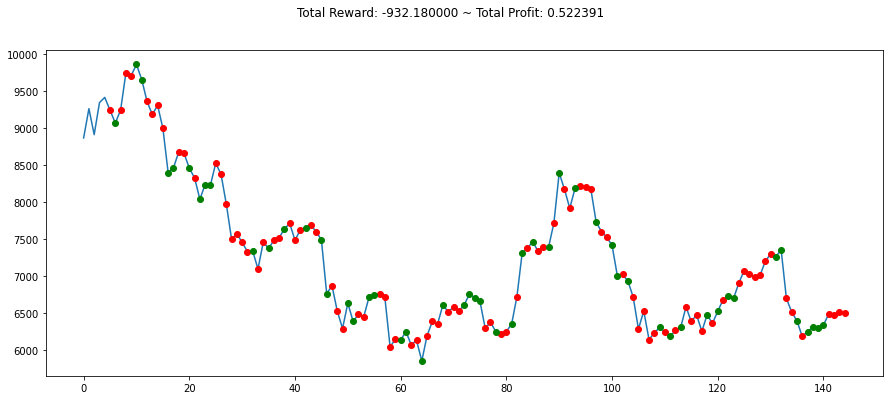

In [17]:

state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [21]:
env_maker = lambda: gym.make('stocks-v0', df=btc, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=10000)

---------------------------------
| explained_variance | -45      |
| fps                | 16       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000213 |
---------------------------------
---------------------------------
| explained_variance | 4.55e-05 |
| fps                | 295      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 4.59e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00313 |
| fps                | 317      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 16.3     |
---------------------------------
----------------------------------
| explained_variance | -9.58e-05 |
| fps                | 330       |
| nupdates           | 300       |
| policy_entropy     | 0.692     |
| total_t

# 4. Evaluation

In [19]:
env = gym.make('stocks-v0', df=btc, frame_bound=(10,150), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -702.5399999999981, 'total_profit': 0.49680784287742524, 'position': 0}


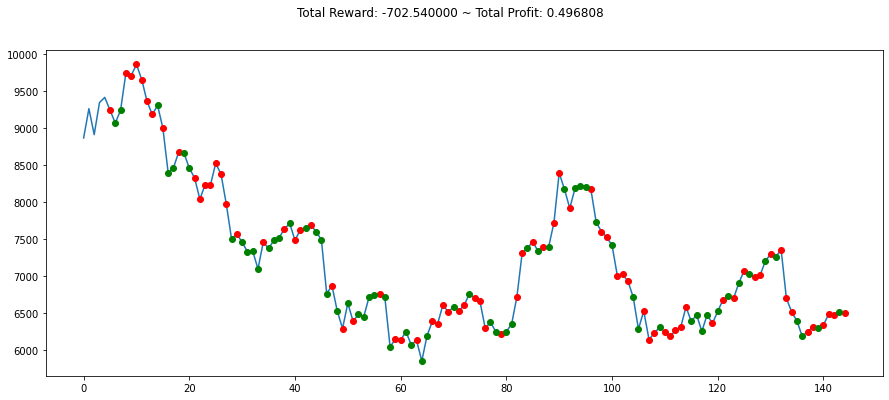

In [20]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()